In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'C:\Users\AKHIL\Downloads\ibm-hr-analytics-employee-attrition-performance\attrition.csv')

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

There are 35 variables in total.

attrition is the dependent variable here. wee need to encode this variable before modelling

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in this dataset

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
for i in df.columns:
    print(i, df[i].unique())

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

attrition, business travel, department, education field, gender, job role, marital status, overtime - needs to be encoded.

over18, standard hours, employee count has only one value in them. we can remove these three columns.

employee number is the id of employee and needs to be removed.


education, environment satisfaction, job involvment, job level, job satisfaction, performance rating, relationship satisfaction, stock option level, work life balance are ordinal data variables

In [7]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There is imbalances in data. we even need to address these imbalances by undersampling or oversampling

In [8]:
df.drop(columns = ['EmployeeCount','EmployeeNumber','Over18','StandardHours'],inplace = True)

In [9]:
df.shape

(1470, 31)

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [11]:
dummy = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

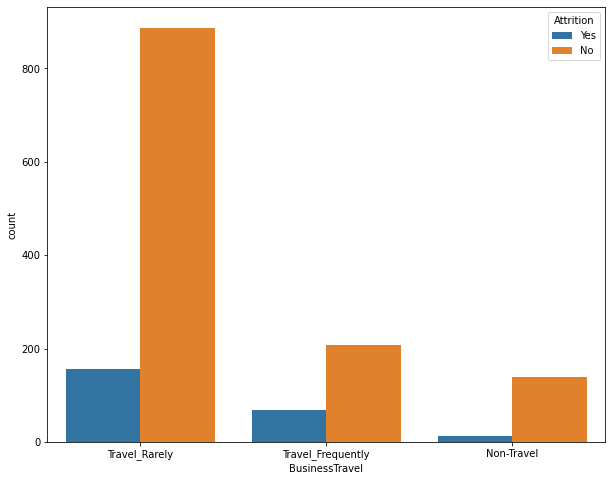

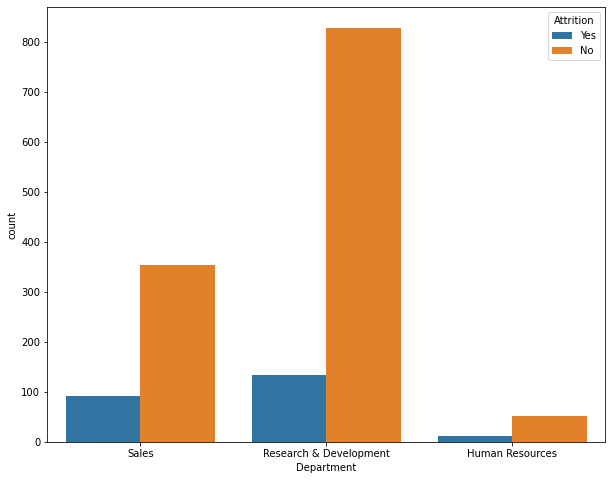

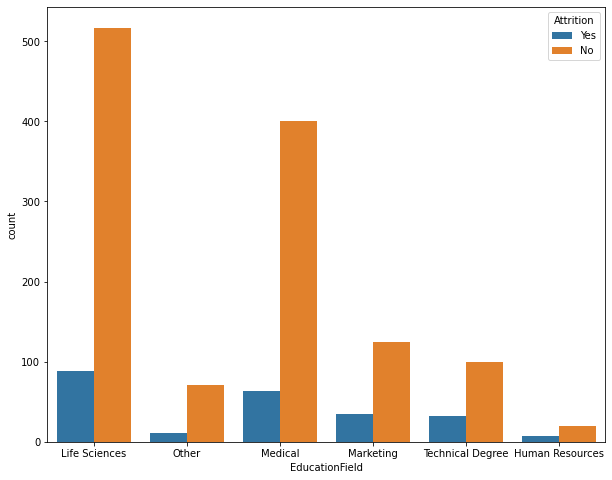

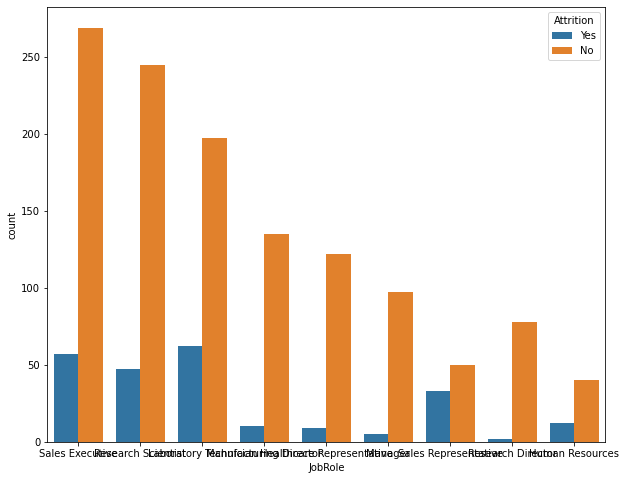

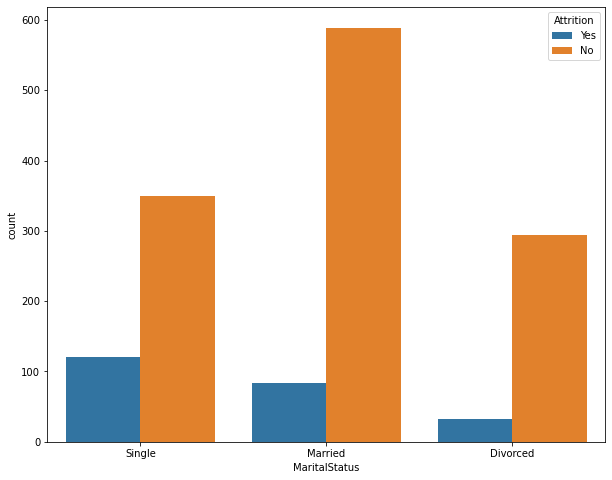

In [12]:
for i in dummy:
    plt.figure(figsize=(10,8))
    sns.countplot(df[i],hue = df.Attrition)

The above is a countplot considering few variables and the value counts for attrition

In [13]:
for i in dummy:
    bt = []
    bt = pd.get_dummies(df[i])
    df = pd.concat([df,bt],axis=1)

In [14]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
503,34,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,2,Male,...,0,0,0,0,1,0,0,0,1,0
822,34,No,Travel_Frequently,1003,Research & Development,2,2,Life Sciences,4,Male,...,0,0,1,0,0,0,0,0,0,1
1289,38,No,Non-Travel,1336,Human Resources,2,3,Human Resources,1,Male,...,0,0,0,0,0,0,0,1,0,0
613,34,No,Travel_Rarely,829,Human Resources,3,2,Human Resources,3,Male,...,0,0,0,0,0,0,0,0,1,0
19,38,No,Travel_Rarely,371,Research & Development,2,3,Life Sciences,4,Male,...,0,0,0,0,1,0,0,0,0,1
120,30,No,Travel_Frequently,1312,Research & Development,23,3,Life Sciences,1,Male,...,0,0,0,0,1,0,0,1,0,0
166,41,No,Travel_Rarely,465,Research & Development,14,3,Life Sciences,1,Male,...,0,0,0,0,1,0,0,1,0,0
668,28,No,Travel_Rarely,995,Research & Development,9,3,Medical,3,Female,...,0,0,0,0,1,0,0,1,0,0
402,30,No,Travel_Rarely,1082,Sales,12,3,Technical Degree,2,Female,...,0,0,0,0,0,1,0,0,0,1
368,40,Yes,Travel_Rarely,575,Sales,22,2,Marketing,3,Male,...,0,0,0,0,0,1,0,0,1,0


In [15]:
df.shape

(1470, 55)

In [16]:
df.drop(columns=dummy, inplace=True)

In [17]:
df.shape

(1470, 50)

In [18]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Human Resources', 'Research & Development', 'Sales',
       'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative', 'Divorced', 'Married', 'Single'],

Education, Environment satisfaction, job involvement, job level, job satisfaction are treated on interval scale. Hence, they are considered as continous variables

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
le.fit_transform(df['Age'])
le.fit_transform(df['Gender'])

array([0, 1, 1, ..., 1, 1, 1])

In [21]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,Yes,1102,1,2,2,Female,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,No,279,8,1,3,Male,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,1373,2,2,4,Male,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,No,1392,3,4,4,Female,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,No,591,2,1,1,Male,40,3,1,...,1,0,0,0,0,0,0,0,1,0


In [22]:
df['Gender']= le.fit_transform(df['Gender'])

In [23]:
df['Gender'][:5]

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int32

0 - Female,   1 - Male

In [24]:
df['Attrition']= le.fit_transform(df['Attrition'])

df['Attrition'][:5]

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

1 - Yes, 0 - No

In [25]:
df.dtypes

Age                           int64
Attrition                     int32
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Non-Travel                    uint8
Travel_Frequently           

In [26]:
df['OverTime']= le.fit_transform(df['OverTime'])

df['OverTime'][:5]

0    1
1    0
2    1
3    1
4    0
Name: OverTime, dtype: int32

1 - Yes, 0 - No

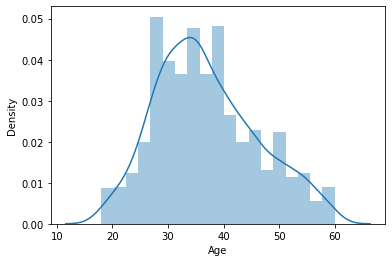

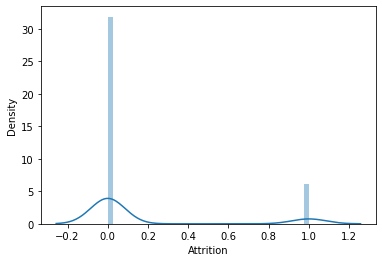

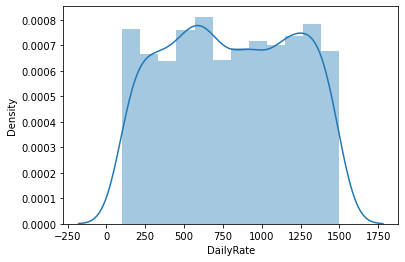

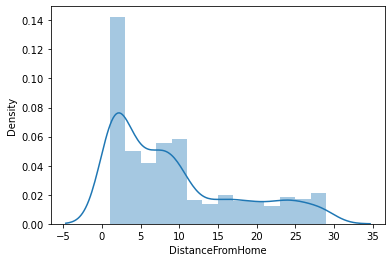

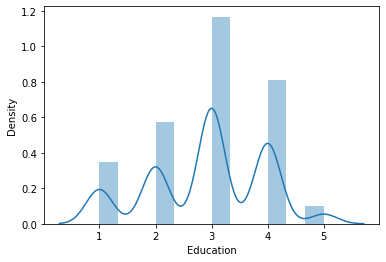

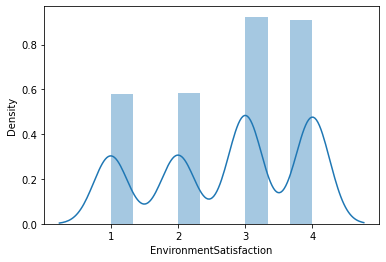

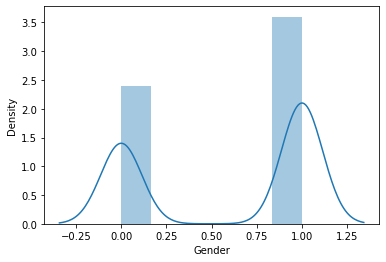

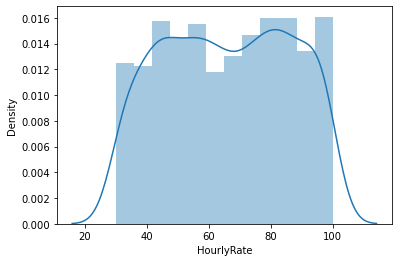

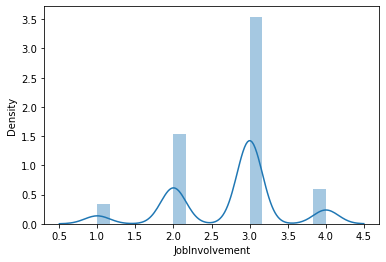

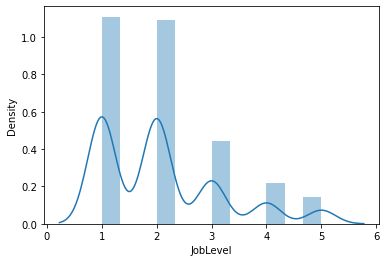

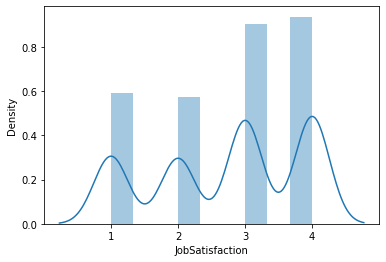

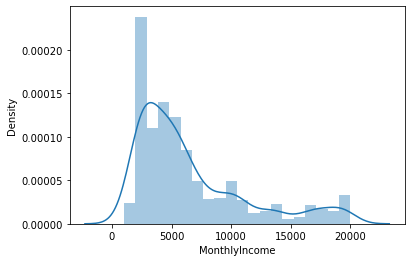

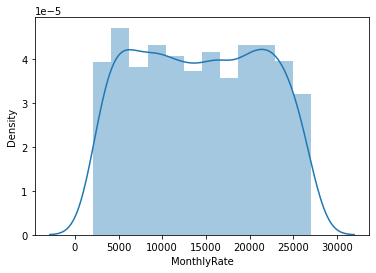

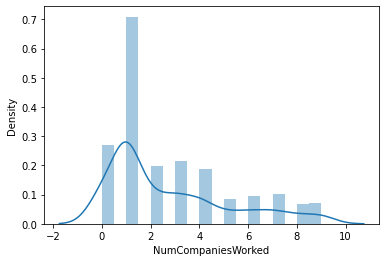

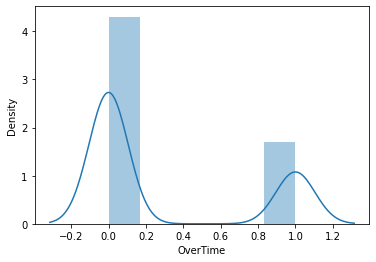

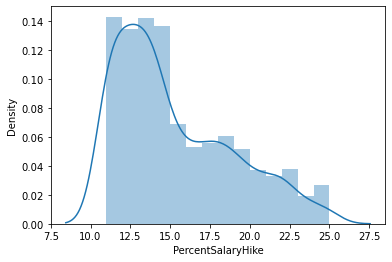

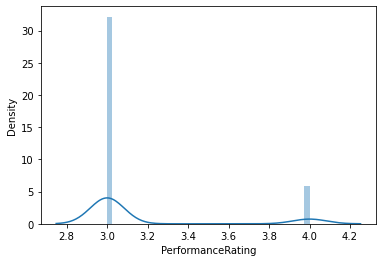

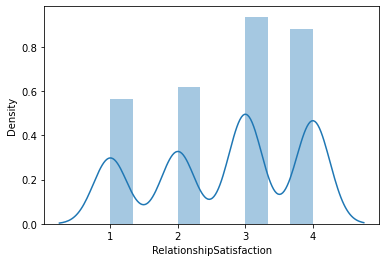

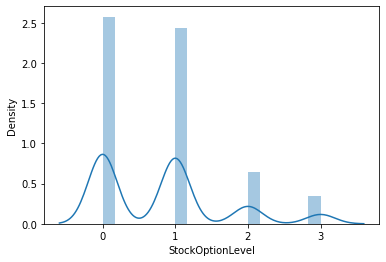

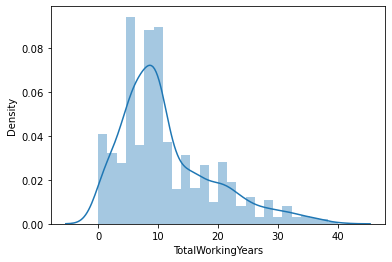

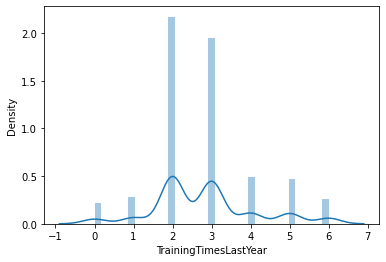

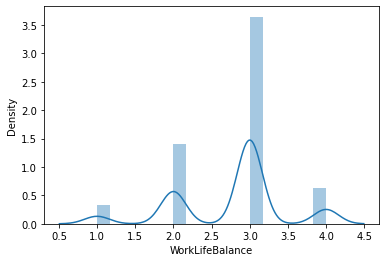

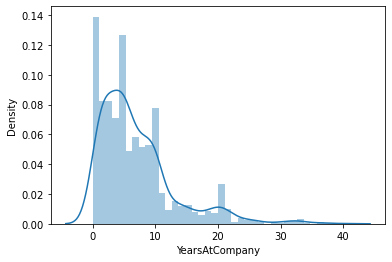

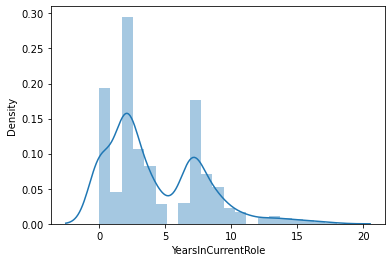

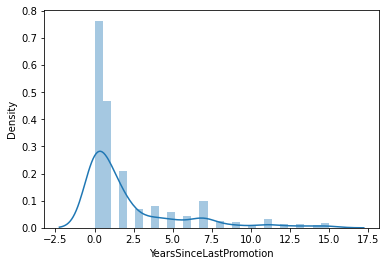

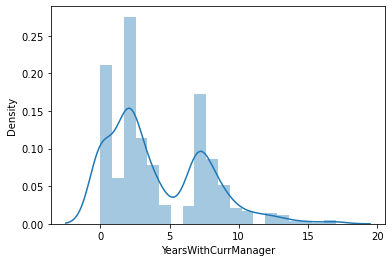

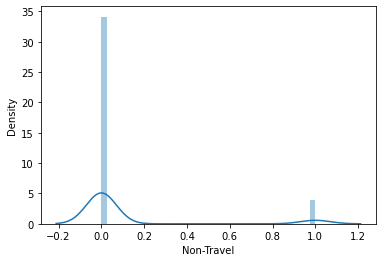

In [27]:
for i in df.columns[:27]:
    plt.subplots()
    sns.distplot(df[i],label = i)

Not even the single variable looks normally distributed

In [28]:
df.skew()

Age                          0.413286
Attrition                    1.844366
DailyRate                   -0.003519
DistanceFromHome             0.958118
Education                   -0.289681
EnvironmentSatisfaction     -0.321654
Gender                      -0.408665
HourlyRate                  -0.032311
JobInvolvement              -0.498419
JobLevel                     1.025401
JobSatisfaction             -0.329672
MonthlyIncome                1.369817
MonthlyRate                  0.018578
NumCompaniesWorked           1.026471
OverTime                     0.964489
PercentSalaryHike            0.821128
PerformanceRating            1.921883
RelationshipSatisfaction    -0.302828
StockOptionLevel             0.968980
TotalWorkingYears            1.117172
TrainingTimesLastYear        0.553124
WorkLifeBalance             -0.552480
YearsAtCompany               1.764529
YearsInCurrentRole           0.917363
YearsSinceLastPromotion      1.984290
YearsWithCurrManager         0.833451
Non-Travel  

In [29]:
df.columns[:26]

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [30]:
cd = ['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

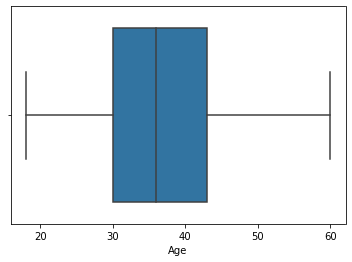

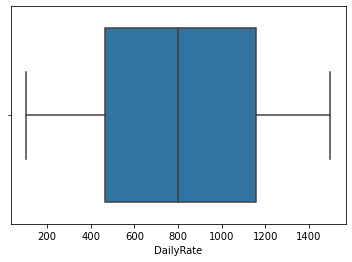

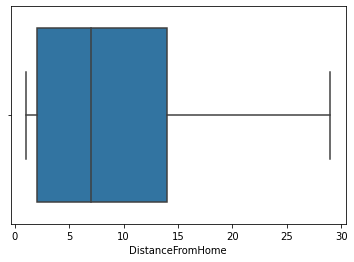

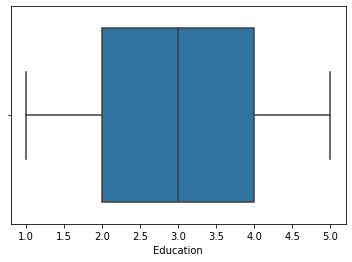

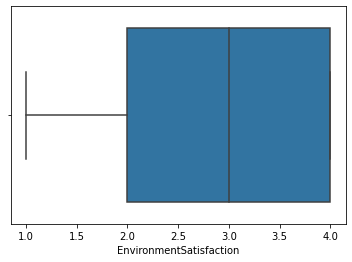

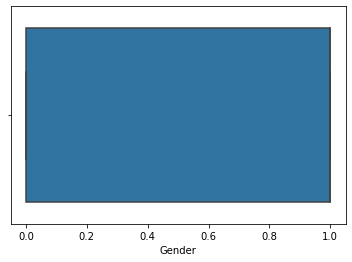

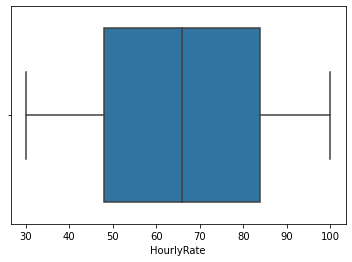

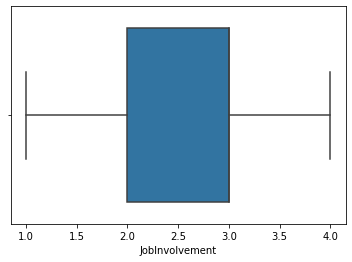

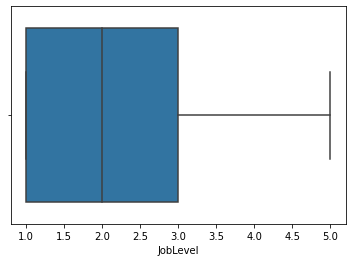

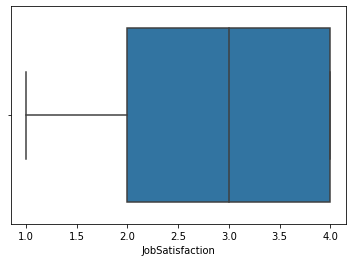

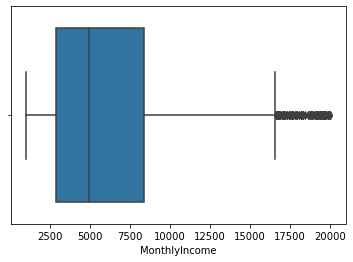

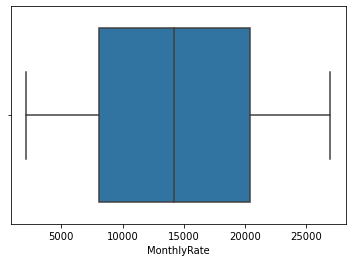

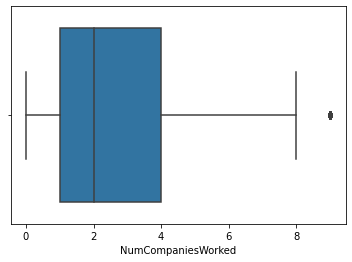

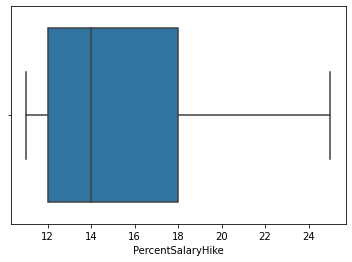

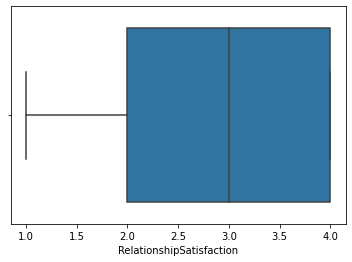

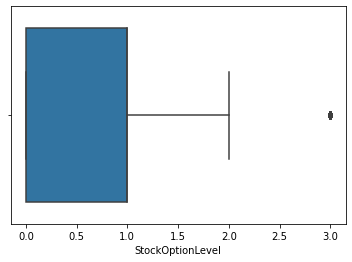

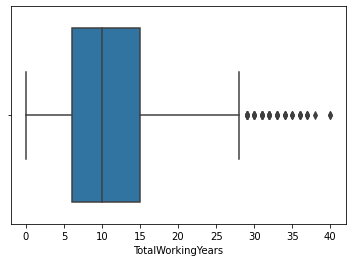

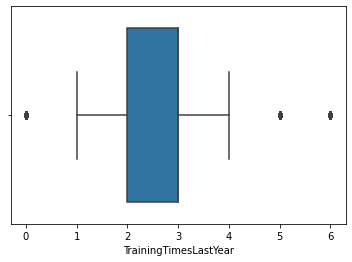

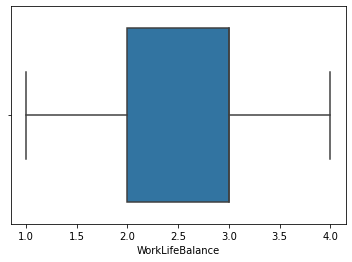

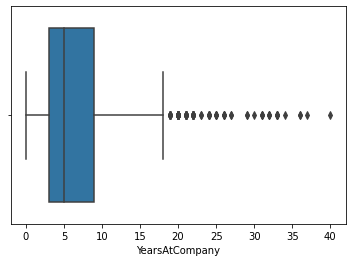

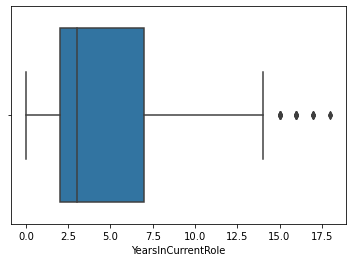

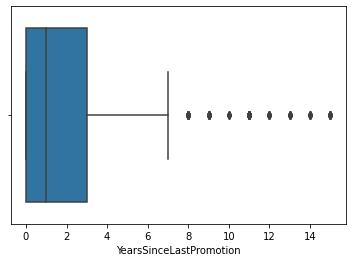

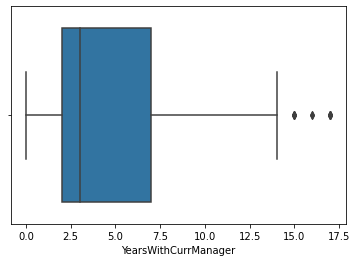

In [31]:
for i in cd:
    plt.subplots()
    sns.boxplot(df[i])

we can see there are many outliers in monthlyincome column

few columns also have outliers, but compared to monthly income they are very low.

In [32]:
df.MonthlyIncome.skew()

1.3698166808390662

Lets try to remove the skewness from this variable using log transform

In [33]:
np.log(df['MonthlyIncome']).skew()

0.2861922926389174

log transform decreased the skewness from 1.36 to 0.28

<AxesSubplot:xlabel='MonthlyIncome'>

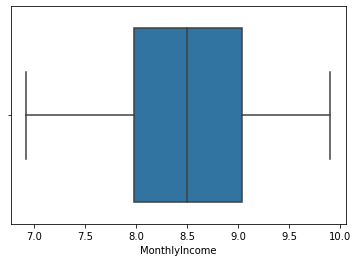

In [34]:
sns.boxplot(np.log(df['MonthlyIncome']))

Now there are no outliers present in this column

In [35]:
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])

In [36]:
df['MonthlyIncome'].head()

0    8.698347
1    8.542861
2    7.644919
3    7.975565
4    8.151333
Name: MonthlyIncome, dtype: float64

The remaining columns with less outliers can be left as usual as decision tree is not affected by outliers.

Before going into training the model, we have already noticed that the dependent variable is imbalanced.

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
os = RandomOverSampler(sampling_strategy = 0.8)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop(columns = ['Attrition'])
Y = df.Attrition

In [42]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [43]:
pd.DataFrame(scaledX,columns=X.columns).head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.153254,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,0.816497,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,0.816497,1.284725,-1.026167,-0.961486,0.246200,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.246200,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.660853,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565


In [44]:
X1, Y1 = os.fit_sample(scaledX,Y)

In [45]:
X1.shape

(2219, 49)

In [46]:
2219/1470

1.5095238095238095

In [47]:
1470 * 0.8

1176.0

In [48]:
1176+1470


2646

In [49]:
Y1.shape

(2219,)

In [50]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [51]:
Y1.value_counts()

0    1233
1     986
Name: Attrition, dtype: int64

In [52]:
1233 * 0.8

986.4000000000001

Since, we have used sampling strategy as 0.8, the value with less number count has been increased in counts

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=0.3,random_state = 11)

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(xtrain,ytrain)
predlr = lr.predict(xtest)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
print(accuracy_score(ytest,predlr))
print(confusion_matrix(ytest,predlr))
print(classification_report(ytest,predlr))

0.7792792792792793
[[288  82]
 [ 65 231]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       370
           1       0.74      0.78      0.76       296

    accuracy                           0.78       666
   macro avg       0.78      0.78      0.78       666
weighted avg       0.78      0.78      0.78       666



The accuracy is around 77% for logistic regression

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(xtrain,ytrain)
preddt = dtc.predict(xtest)

print(accuracy_score(ytest,preddt))
print(confusion_matrix(ytest,preddt))
print(classification_report(ytest,preddt))

0.9054054054054054
[[309  61]
 [  2 294]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       370
           1       0.83      0.99      0.90       296

    accuracy                           0.91       666
   macro avg       0.91      0.91      0.91       666
weighted avg       0.92      0.91      0.91       666



Decision tree classifier gives accuracy of around 87 % which is pretty good

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(xtrain,ytrain)
predrf = rfc.predict(xtest)

print(accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

0.9744744744744744
[[357  13]
 [  4 292]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       370
           1       0.96      0.99      0.97       296

    accuracy                           0.97       666
   macro avg       0.97      0.98      0.97       666
weighted avg       0.97      0.97      0.97       666



The random forest regressor is giving the highest accuracy of around 97 %, may be the model is being overfitted

In [59]:
from sklearn.model_selection import cross_val_score

print('lr ',cross_val_score(lr,xtrain,ytrain,cv=5).mean())
print('dtc ',cross_val_score(dtc,xtrain,ytrain,cv=5).mean())
print('rfc',cross_val_score(rfc,xtrain,ytrain,cv=5).mean())

lr  0.7830349548801993
dtc  0.8776537703557722
rfc 0.9484970438751168


looking at the above cross val scores, we can see that decision tree classifier has the least difference with accuracy scores.

Therefore, we consider decision tree classifier for this problem.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {'max_depth':np.arange(2,20),'criterion':['gini','entorpy']}

gs = GridSearchCV(dtc,param_grid = parameters,cv=5)

In [62]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [63]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [64]:
mod = DecisionTreeClassifier(criterion = 'gini',max_depth = 16)

In [65]:
mod.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=16)

In [66]:
pred = mod.predict(xtest)

In [67]:
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.9039039039039038
[[308  62]
 [  2 294]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       370
           1       0.83      0.99      0.90       296

    accuracy                           0.90       666
   macro avg       0.91      0.91      0.90       666
weighted avg       0.92      0.90      0.90       666



In [68]:
mod.score(xtest,ytest)

0.9039039039039038

The accuracy after turning the parameter is 87.3%

In [69]:
from sklearn.metrics import plot_roc_curve

Text(0, 0.5, 'True Positive Rate')

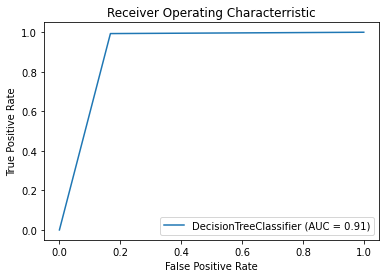

In [70]:
plot_roc_curve(mod,xtest,ytest)
plt.title("Receiver Operating Characterristic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



area under the curve is 0.88

The accuracy of the decision tree model is 88% and is within the acceptable limits of 85-95

## Conclusion

We have used, logistic regression, decision tree classifier and random forest classifier.

logistic regression - 77%

Decision Tree - 88%

Random forest - 97%  - May be over fitting.

Therfore, we choose decision tree classifier in this scenario.

we validated the score with cross_val_score and found no difference at all.

HyperParameter tuning is done using GridSearchCV and best parameters found are max_depth = 16 and criterion as gini.

With these parameters the final model has been built.

In [71]:
import pickle

filename = 'attrition.pkl'
pickle.dump(mod,open(filename,'wb'))